In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [74]:
import warnings

warnings.filterwarnings("ignore")

In [75]:
data = pd.read_csv('E://ML-Prac//insurance.csv')

In [76]:
display(data) # Few observations in the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
print('Shape of the data', data.shape)   # shape of the data
print('Number of observations in the dataset are ', data.shape[0])  # No of observations in the dataset

Shape of the data (1338, 7)
Number of observations in the dataset are  1338


# EDA

In [78]:
data.info() # Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Age(Int64), Bmi(float64), children(int 64), charges(float64) are numerical variables.
sex, smoker, region are categorical variables.

In [79]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [80]:
data.columns #Total features of the dataset

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

* age - Age of primary beneficiary
* sex - Insurance contractor gender, female / male
* bmi - Body Mass Index
* children - Number of children covered by health insurance / Number of dependents
* smoker - Smoker / Non - smoker
* region - The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
* charges - Individual medical costs billed by health insurance.

In [81]:
data.describe().T  #Statistical summary of numerical variables

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [82]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [83]:
data.isnull().sum() # Checking whether null value exists or not

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in the dataset

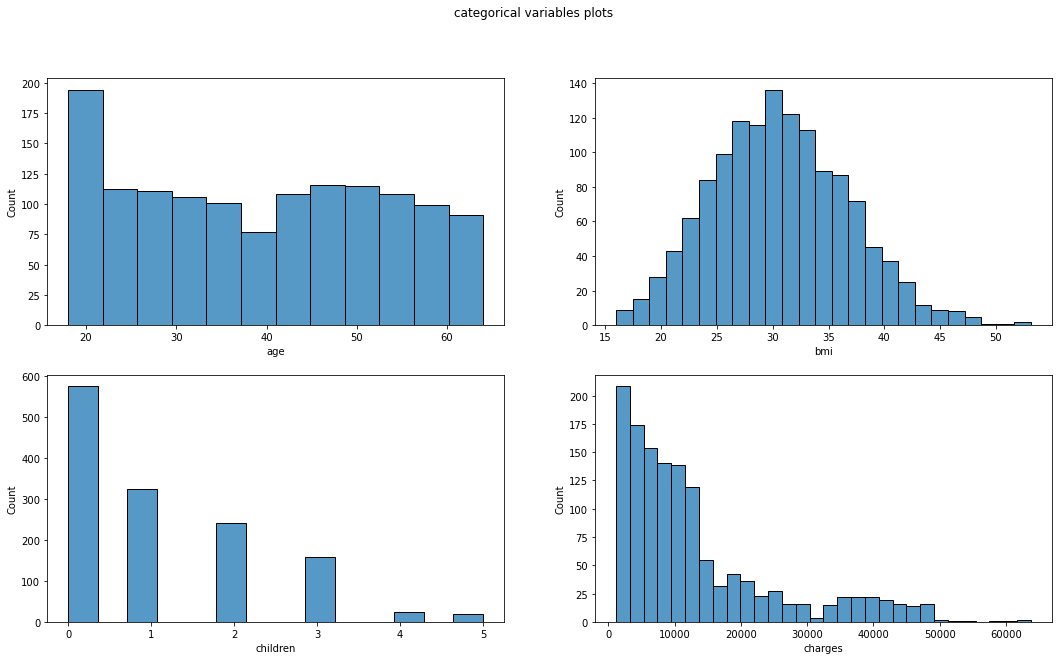

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('categorical variables plots')

sns.histplot(ax=axes[0, 0], data=data, x='age')
sns.histplot(ax=axes[0, 1], data=data, x='bmi')
sns.histplot(ax=axes[1, 0], data=data, x='children')
sns.histplot(ax=axes[1, 1], data=data, x='charges')

plt.show()

* BMI follows Normal Distribution.

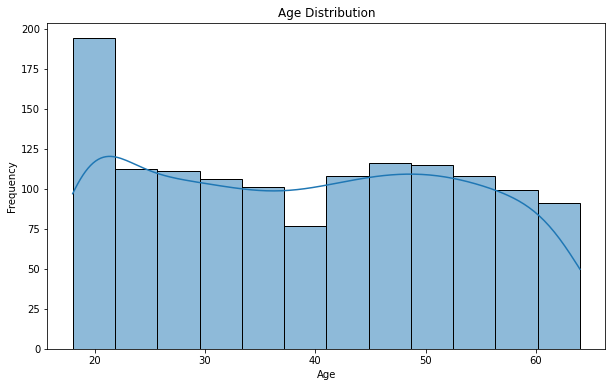

In [85]:
plt.figure(figsize=(10, 6))

sns.histplot(x='age', data=data, kde=True)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Insurance customers at age group 20 are high in number
* All age group members felt having insurance is good.

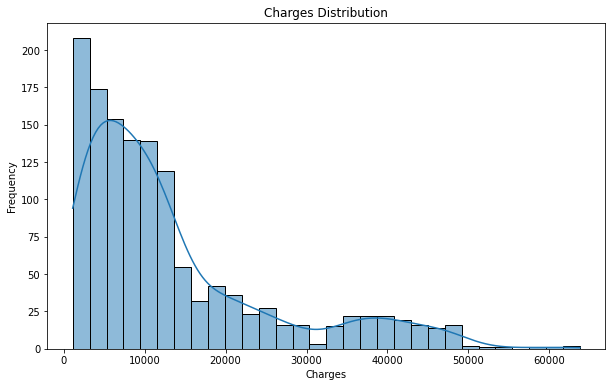

In [86]:
plt.figure(figsize=(10, 6))

sns.histplot(x='charges', data=data, kde=True)

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

* Charges are right skewed
* Most of the medical costs billed by health insurance are less than 10000$

<AxesSubplot:xlabel='smoker', ylabel='count'>

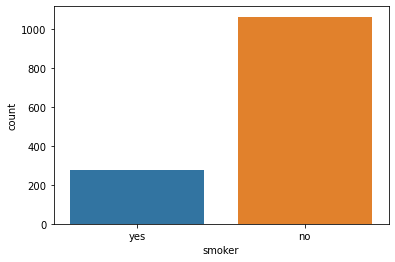

In [87]:
sns.countplot(data.smoker)

* non-smokers are more in number than smokers.

<AxesSubplot:xlabel='region', ylabel='count'>

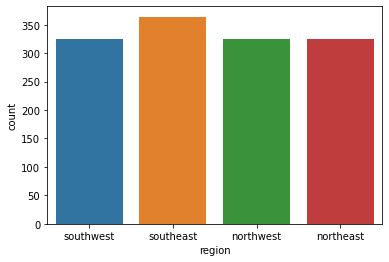

In [88]:
sns.countplot(data.region)

* Highest number of insurance payers are from south east region.

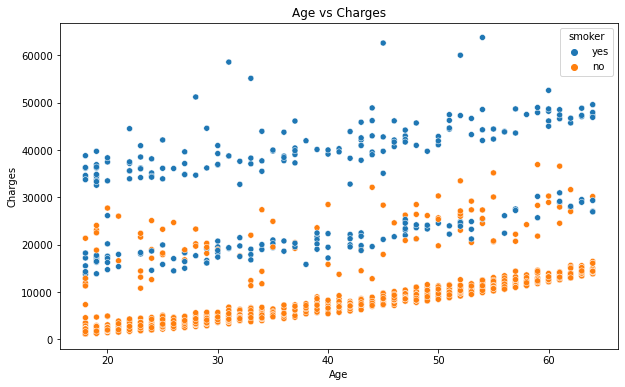

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges',data=data, hue='smoker')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

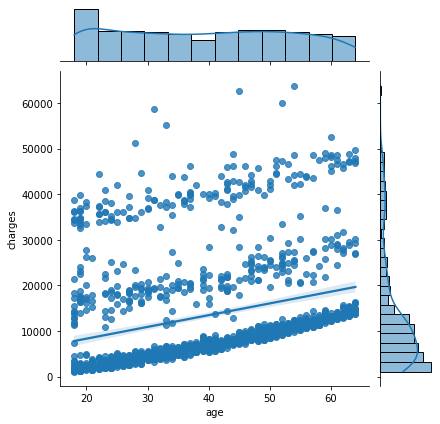

In [90]:
sns.jointplot(x='age',y='charges', data = data, kind = 'reg')
plt.show()

* As age increases their medical charges are also increasing.
* People across all age groups are smoking.
* Smokers are having more health issues compare to non smokers in all age groups.

In [91]:
data = pd.get_dummies(data)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [92]:
cormat = data.corr(method='pearson') # Correlation between numerical variables
display(cormat)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


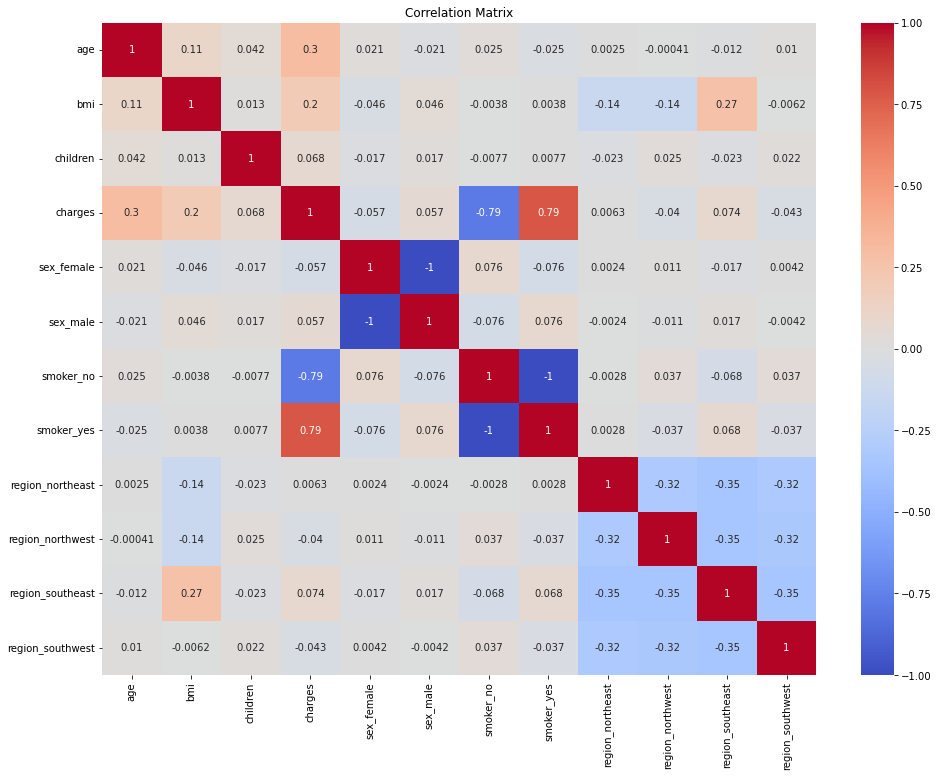

In [93]:
plt.figure(figsize=(16, 12))
sns.heatmap(cormat, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

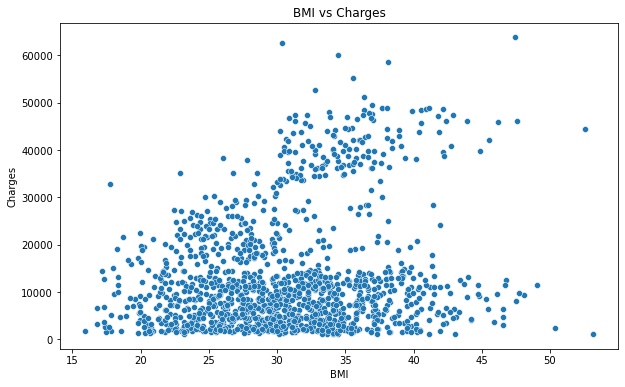

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

* Smokers at the age group 30 to 40 are consuming high medical charges

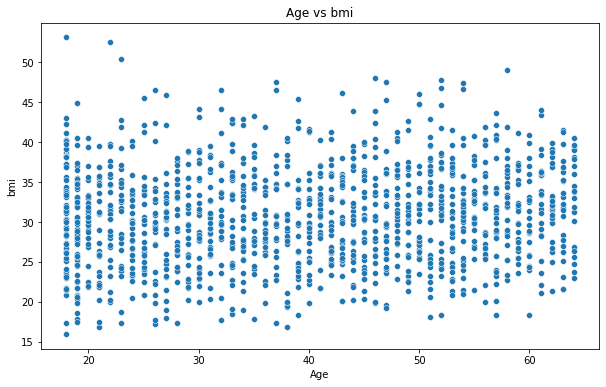

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi',data=data)
plt.title('Age vs bmi')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()

* Bmi and Age are not much related to each other

In [96]:
# Seperating target variable and remaining variables
y = data.charges
X = data.drop(columns="charges", axis=1) # age, sex, bmi, childre.drop(columns="charges", axis=1) , smoker, region


In [97]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [98]:
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [99]:
from tqdm import tnrange, tqdm_notebook
import itertools
 
m = 6

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})

Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

In [100]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
df_max_adj = df[df.groupby('numb_features')['Adj_R_squared'].transform(max) == df['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head(10))

,numb_features,RSS,R_squared,Adj_R_squared,features
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
6,1,7.455432e+10,0.619765,0.619480,"(smoker_yes,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker_no)"


,numb_features,RSS,R_squared,Adj_R_squared,features
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
6,1,7.455432e+10,0.619765,0.619480,"(smoker_yes,)"
15,2,5.462612e+10,0.721401,0.720983,"(age, smoker_no)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
70,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_yes)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker_no)"
234,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker_yes)"
575,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker_no, region_northeast)"
579,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker_yes, region_northe..."


In [101]:
display(df)

,numb_features,RSS,R_squared,Adj_R_squared,features
0,1,1.785440e+11,0.089406,0.088724,"(age,)"
1,1,1.883608e+11,0.039339,0.038620,"(bmi,)"
2,1,1.951676e+11,0.004624,0.003879,"(children,)"
3,1,1.954306e+11,0.003282,0.002536,"(sex_female,)"
4,1,1.954306e+11,0.003282,0.002536,"(sex_male,)"
...,...,...,...,...,...
2042,10,4.883953e+10,0.750913,0.749036,"(age, bmi, children, sex_male, smoker_no, smok..."
2043,10,4.927708e+10,0.748681,0.746788,"(age, bmi, sex_female, sex_male, smoker_no, sm..."
2044,10,5.400876e+10,0.724549,0.722474,"(age, children, sex_female, sex_male, smoker_n..."
2045,10,6.596401e+10,0.663576,0.661041,"(bmi, children, sex_female, sex_male, smoker_n..."


In [102]:
selected_features = list(df.sort_values(by='Adj_R_squared', ascending=False).iloc[0][4])
print(f"Selected features: {selected_features}\nThese features have been selected for the model based on the Adjusted R square value.")

Selected features: ['age', 'bmi', 'children', 'smoker_no', 'region_northeast', 'region_northwest']
These features have been selected for the model based on the Adjusted R square value.


#  Modelling 

In [103]:
# splitting data
from sklearn.model_selection import train_test_split

y = data["charges"]
X = data[selected_features]



Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [104]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, ytrain)

print(f"Score of Training dataset: \t{round(model.score(Xtrain, ytrain)*100,3)}%")
print(f"Score of Test dataset: \t\t{round(model.score(Xtest, ytest)*100,3)}%")

Score of Training dataset: 	74.928%
Score of Test dataset: 		75.57%


* Score of Training dataset: 	74.928%
* Score of Test dataset: 		75.57%